# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning Para Aplicações de IA com PyTorch e Lightning</font>

## <font color='blue'>Estudo de Caso 1</font>
## <font color='blue'>Comparando o Efeito de Diferentes Funções de Ativação em Deep Learning</font>

![title](imagens/EC1.png)

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
!pip install -q torch==1.13.0

In [4]:
!pip install -q torchvision==0.14.0

In [5]:
# Imports
import time
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

torch      : 1.13.0
matplotlib : 3.6.2
torchvision: 0.14.0
numpy      : 1.21.0



## Carregando os Dados e Definindo as Transformações

Para este estudo de caso nosso objetivo é construir um modelo de classificação de imagens, ou seja, um modelo de Visão Computacional. Dada uma imagem o modelo deve entregar a probabilidade de classe a qual a imagem pertence.

Nosso conjunto de dados contém imagens de dígitos de 0 a 9. Cada imagem tem um dígito em diferentes formatos. Logo, cada imagem pode pertencer a uma de 10 classes possíveis. Criaremos um modelo de classificação multiclasse.

Antes de fazer o download dos dados, vamos definir quais são as transformações que queremos executar em nossos dados.

Vamos aplicar uma edição personalizada nas imagens, para que todas as imagens tenham as mesmas dimensões e propriedades. Fazemos isso usando torchvision.transforms.

* O método transforms.ToTensor() converte a imagem em números, que são compreensíveis pelo sistema. Ele separa a imagem em três canais de cores: vermelho, verde e azul (RGB). Em seguida, converte os pixels de cada imagem no brilho de suas cores entre 0 e 255. Esses valores são reduzidos para um intervalo entre 0 e 1. A imagem agora é um tensor PyTorch.


* O método transforms.Normalize() normaliza o tensor colocando os valores na mesma escala.

In [7]:
# Função para transformar os dados ao carregar, aplicando normalização com média e desvio padrão de 0.5
transformacoes = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

Agora baixamos os conjuntos de dados, embaralhamos e transformamos. Fazemos o download dos conjuntos de dados e os carregamos no DataLoader, que combina o conjunto de dados e um amostrador e fornece iteradores de processo único ou multiprocessos sobre o conjunto de dados.

In [8]:
# Carrega os dados de treino
dados_treino = torch.utils.data.DataLoader(datasets.MNIST('dados', 
                                                          train = True, 
                                                          download = True, 
                                                          transform = transformacoes),
                                                          batch_size = 64, 
                                                          shuffle = True)

In [9]:
# Carrega os dados de teste
dados_teste = torch.utils.data.DataLoader(datasets.MNIST('dados', 
                                                         train = False, 
                                                         transform = transformacoes),
                                                         batch_size = 64, 
                                                         shuffle = True)

O tamanho do lote é o número de imagens que queremos ler de uma só vez.

In [10]:
# Visualizando a dimensão dos dados de treino
dataiter = iter(dados_treino)
images, labels = next(dataiter)

In [11]:
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


O formato das imagens torch.Size ([64,1,28,28]), indica que existem 64 imagens em cada lote e cada imagem tem uma dimensão de 28 x 28 pixels. Da mesma forma, os rótulos têm a forma de torch.Size ([64]). 

Adivinha por que? - Sim, você está certo! 64 imagens devem ter 64 rótulos, respectivamente. É isso aí. Fácil!

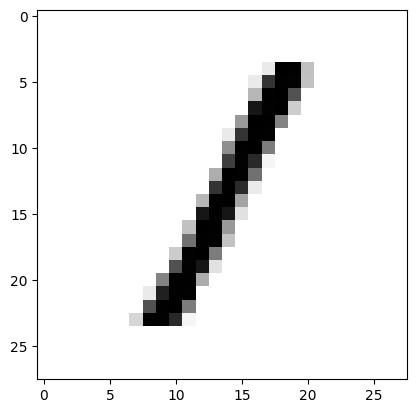

In [12]:
# Visualizando uma imagem
plt.imshow(images[0].numpy().squeeze(), cmap = 'gray_r');

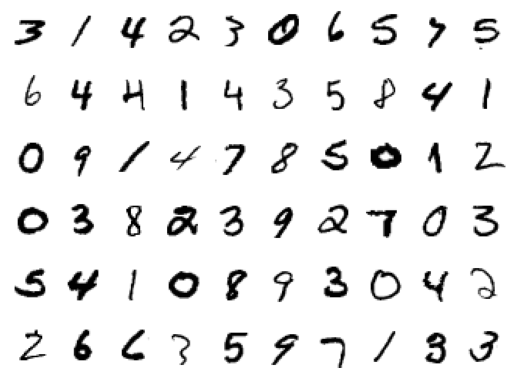

In [13]:
# Visualizando várias imagens
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap = 'gray_r')

## Modelagem

Arquitetura do Modelo:

![](./imagens/nn.png)

Vamos começar com a ReLu e analisar o efeito de diferentes funções de ativação.

https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

In [14]:
# Hiperparâmetros da rede
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

### Função de Ativação ReLU 

ReLU significa função de ativação linear retificada. É uma função não linear e, graficamente, ReLU tem o seguinte comportamento transformativo:

![](./imagens/relu.png)

ReLU é uma função de ativação popular, pois é diferenciável e não linear. Se as entradas forem negativas, sua derivada torna-se zero, o que causa a "morte" dos neurônios e o aprendizado não ocorre. A ReLU permite a passagem de valores positivos, enquanto valores negativos são modificados para zero.

In [15]:
# Modelo com função de ativação ReLu
modelo_fa = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),  # 784 x 128
                          nn.ReLU(),
                          nn.Linear(hidden_sizes[0], hidden_sizes[1]),  # 128 x 64
                          nn.ReLU(),
                          nn.Linear(hidden_sizes[1], output_size),  # 64 x 10
                          nn.LogSoftmax(dim = 1))

### Função de Ativação LeakyReLU 

Leaky ReLU Activation Function ou LReLU é outro tipo de função de ativação que é semelhante a ReLU, mas resolve o problema de neurônios 'mortos' e, graficamente, a Leaky ReLU tem o seguinte comportamento transformativo:

![](./imagens/lrelu.png)

Esta função é muito útil porque quando a entrada é negativa a diferenciação da função não é zero. Portanto, o aprendizado dos neurônios não para. 

In [16]:
# Modelo com função de ativação LeakyReLU
#modelo_fa = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),  # 784 x 128
#                          nn.LeakyReLU(0.2),
#                          nn.Linear(hidden_sizes[0], hidden_sizes[1]),  # 128 x 64
#                          nn.LeakyReLU(0.2),
#                          nn.Linear(hidden_sizes[1], output_size),  # 64 x 10
#                          nn.LogSoftmax(dim = 1))

### Função de Ativação Sigmoid 

A Função Sigmoide é uma função de ativação não linear e diferenciável. É uma curva em forma de S que não passa pela origem. Ela produz uma saída que fica entre 0 e 1. Os valores de saída são frequentemente tratados como uma probabilidade. É frequentemente usado para classificação binária. É lento na computação e, graficamente, a Sigmoid tem o seguinte comportamento transformativo:

![](./imagens/sigmoid.png)

A função de ativação sigmóide tem um problema de “Vanishing Gradient”. Vanishing Gradient é um problema significativo, pois um grande número de entradas é alimentado para a rede neural e o número de camadas ocultas aumenta, o gradiente ou derivada torna-se próximo de zero, levando à imprecisão na rede neural. Usamos a sigmóide em situações bem específicas.

In [17]:
# Modelo com função de ativação Sigmoid
#modelo_fa = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),  # 784 x 128
#                          nn.Sigmoid(),
#                          nn.Linear(hidden_sizes[0], hidden_sizes[1]),  # 128 x 64
#                          nn.Sigmoid(),
#                          nn.Linear(hidden_sizes[1], output_size),  # 64 x 10
#                          nn.LogSoftmax(dim = 1))

### Função de Ativação Tanh 

A função Tanh é uma função não linear e diferenciável semelhante à função sigmóide, mas os valores de saída variam de -1 a +1. É uma curva em forma de S que passa pela origem e, graficamente Tanh tem o seguinte comportamento transformativo:

![](./imagens/tanh.png)

O problema com a função Tanh é que ela é lenta e o problema do “Vanishing Gradient” persiste. 

In [18]:
# Modelo com função de ativação Tanh
#modelo_fa = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),  # 784 x 128
#                          nn.Tanh(),
#                          nn.Linear(hidden_sizes[0], hidden_sizes[1]),  # 128 x 64
#                          nn.Tanh(),
#                          nn.Linear(hidden_sizes[1], output_size),  # 64 x 10
#                          nn.LogSoftmax(dim = 1))

In [19]:
print(modelo_fa)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


O nn.Sequential envolve as camadas na rede. Existem três camadas lineares e duas camadas com função de ativação. A camada de saída é uma camada linear com a ativação LogSoftmax porque este é um problema de classificação.

Tecnicamente, uma função LogSoftmax é o logaritmo de uma função Softmax como o nome indica e se parece com isso, conforme mostrado abaixo.

![](./imagens/logsoftmax.png)

Em seguida, definimos a perda de probabilidade logarítmica negativa (**negative log-likelihood loss**). Juntos, o LogSoftmax() e o NLLLoss() atuam como a perda de entropia cruzada, conforme mostrado no diagrama da arquitetura de rede acima.

Além disso, você deve estar se perguntando por que temos 784 unidades na primeira camada. É porque "achatamos" cada imagem antes de enviá-la para dentro da rede neural. (28 x 28 = 784)

In [20]:
# Função de custo do modelo
criterion = nn.NLLLoss()

In [21]:
# Obtendo os lotes de dados
images, labels = next(iter(dados_treino))

In [22]:
# Ajustando o shape
images = images.view(images.shape[0], -1)

In [23]:
# Logs das probabilidades de classe
logps = modelo_fa(images) 

In [24]:
# Perda
loss = criterion(logps, labels) 

Uma rede neural aprende iterando várias vezes nos dados disponíveis. Os termos aprendidos referem-se ao ajuste de pesos da rede para minimizar a perda. Vamos visualizar como funciona.

In [25]:
print('\nAntes do Backward Pass: \n', modelo_fa[0].weight.grad)
loss.backward()
print('\nDepois do Backward Pass: \n', modelo_fa[0].weight.grad)


Antes do Backward Pass: 
 None

Depois do Backward Pass: 
 tensor([[ 0.0021,  0.0021,  0.0021,  ...,  0.0021,  0.0021,  0.0021],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [ 0.0029,  0.0029,  0.0029,  ...,  0.0029,  0.0029,  0.0029],
        ...,
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015]])


Treinamento

In [26]:
# Otimizador
optimizer = optim.SGD(modelo_fa.parameters(), lr = 0.003, momentum = 0.9)

# Número de épocas
epochs = 5

# Loop de treinamento
for e in range(epochs):
    
    # Registra o momento de início da época
    start_time = time.time()
    
    # Zera o erro da época
    running_loss = 0
    
    # Loop pelas imagens e labels
    for images, labels in dados_treino:
        
        # Flatten das imagens 
        images = images.view(images.shape[0], -1)
    
        # Zera os gradientes
        optimizer.zero_grad()
        
        # Previsão com o modelo
        output = modelo_fa(images)
        
        # Cálculo do erro
        loss = criterion(output, labels)
        
        # Aqui acontece o aprendizado com backpropagation
        loss.backward()
        
        # E aqui otimiza os pesos
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print('Epoch: {0}, Tempo Decorrido: {1:.2f}s, Loss(Erro): {2}'.format(e, 
                                                                          time.time() - start_time, 
                                                                          running_loss / len(dados_treino)))

Epoch: 0, Tempo Decorrido: 10.49s, Loss(Erro): 0.6231667195667209
Epoch: 1, Tempo Decorrido: 9.44s, Loss(Erro): 0.28147810827821557
Epoch: 2, Tempo Decorrido: 9.29s, Loss(Erro): 0.2233362712823887
Epoch: 3, Tempo Decorrido: 9.53s, Loss(Erro): 0.18236889939771087
Epoch: 4, Tempo Decorrido: 9.41s, Loss(Erro): 0.1529435122679514


Avaliação e teste

In [27]:
# Função para visualizar a classificação
def visualiza_classe(img, ps):
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize = (6,9), ncols = 2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Probabilidade de Classe')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Dígito Previsto = 5


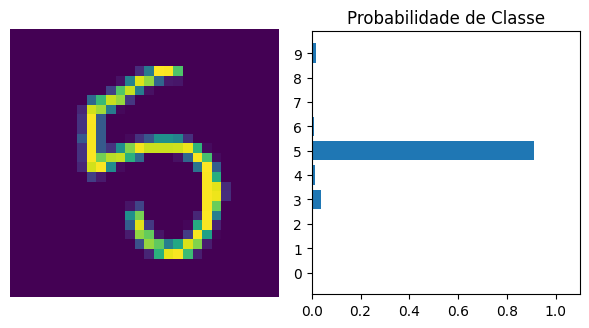

In [28]:
# Obtém uma imagem de teste
images, labels = next(iter(dados_teste))

# Ajusta a imagem
img = images[0].view(1, 784)

# Faz previsão com a imagem
with torch.no_grad():
    logps = modelo_fa(img)

# Log de probabilidade da previsão
ps = torch.exp(logps)
probab = list(ps.numpy()[0])

# Print
print("Dígito Previsto =", probab.index(max(probab)))

# Visualiza classe
visualiza_classe(img.view(1, 28, 28), ps)

Agora, iteramos pelo conjunto de teste usando um loop for e calculamos o número total de previsões corretas. É assim que podemos calcular a precisão.

In [29]:
# Avaliando o modelo

# Contadores
correct_count, all_count = 0, 0

# Loop
for images,labels in dados_teste:
    for i in range(len(labels)):
        
        img = images[i].view(1, 784)
        
        with torch.no_grad():
            logps = modelo_fa(img)

        ps = torch.exp(logps)
        
        probab = list(ps.numpy()[0])
        
        pred_label = probab.index(max(probab))
        
        true_label = labels.numpy()[i]
        
        if(true_label == pred_label):
            correct_count += 1
        
        all_count += 1

print("Número de Imagens Testadas =", all_count)
print("Acurácia nos Dados de Teste (%) =", (correct_count/all_count) * 100)

Número de Imagens Testadas = 10000
Acurácia nos Dados de Teste (%) = 95.77


In [30]:
# Salvando o modelo
torch.save(modelo_fa, 'modelos/modelo_fa.pt') 

In [31]:
# Resultado da avaliação dos modelos (pode ser ligeiramente diferente a cada execução)

# ReLU - Acc de 96.05%
# LeakyReLU - Acc de 95.40%
# Sigmoid - Acc de 88.51%
# Tanh - Acc de 95.52%

# Fim